In [1]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt



In [2]:
class SentimentAnalysis:
    def __init__(self):
        self.tweets = []
        self.tweetText = []
    def DownloadData(self):
        consumer_key = "zMyFVPMKyVch1fNUteJFQ2Ua6"
        consumer_secret = "3hKCld7ATatTLcQe0VsbRhoaiDZsalYBKgjxG4ZRsc02jAz6FW"
        access_key= "780012488720916480-qVunNf6SgQ0PcFQhXTrgRgsZt1MVN45"
        access_secret = "B6tXe7teT684VFuQoyHx99mCg6fxbYhUBClDk3v1bkrHK"
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth,wait_on_rate_limit=True)
        
        searchTerm = input("\n Enter the tweet you want to analyze")
        NoOfTerms = int(input("\n How many no of tweets you want to analyze"))
        
        self.tweets = tweepy.Cursor(api.search_tweets, q=searchTerm, lang = "en").items(NoOfTerms)
        
        csvFile = open('NewNoteBook.csv', 'a')
        csvWriter = csv.writer(csvFile)
        
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0
        
        for tweet in self.tweets:
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            analysis = TextBlob(tweet.text)
            polarity += analysis.sentiment.polarity

            if (analysis.sentiment.polarity == 0):
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1
                
        
        
        csvWriter.writerow(self.tweetText)
        csvFile.close()
        
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)
        
        
        polarity = polarity / NoOfTerms
        print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms) + " tweets.")
        print()
        print("General Report: ")
        
        
        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")
            
            
            
        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")
        
        
        
        
        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)
        
        
        
    def cleanTweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())
        
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')
        
    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]','Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
     






 Enter the tweet you want to analyzeRonaldo

 How many no of tweets you want to analyze500
How people are reacting on Ronaldo by analyzing 500 tweets.

General Report: 
Weakly Positive

Detailed Report: 
12.60% people thought it was positive
37.00% people thought it was weakly positive
3.60% people thought it was strongly positive
0.80% people thought it was negative
6.80% people thought it was weakly negative
0.80% people thought it was strongly negative
38.00% people thought it was neutral


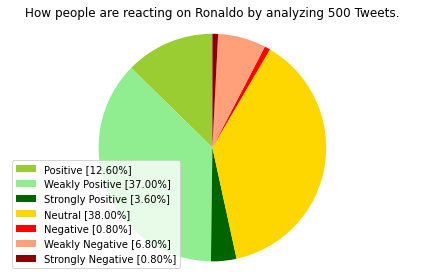

In [4]:
if __name__== "__main__":
    sa = SentimentAnalysis()
    sa.DownloadData()